In [11]:
import pandas as pd
from bokeh.plotting import ColumnDataSource, figure, show, output_notebook, output_file

In [2]:
df = pd.read_csv('../data/full_data.csv')[['artist', 'title', 'year', 'zcr', 'bandwidth', 'centroid', 'rolloff', 'acousticness', 'danceability',
       'energy', 'loudness', 'speechiness', 'tempo', 'valence']]

### The below scatter matrix looks at all of the named features (in other words, everything except for the MFCC and chroma features.) This includes spectral features and the ones pulled from Spotify.

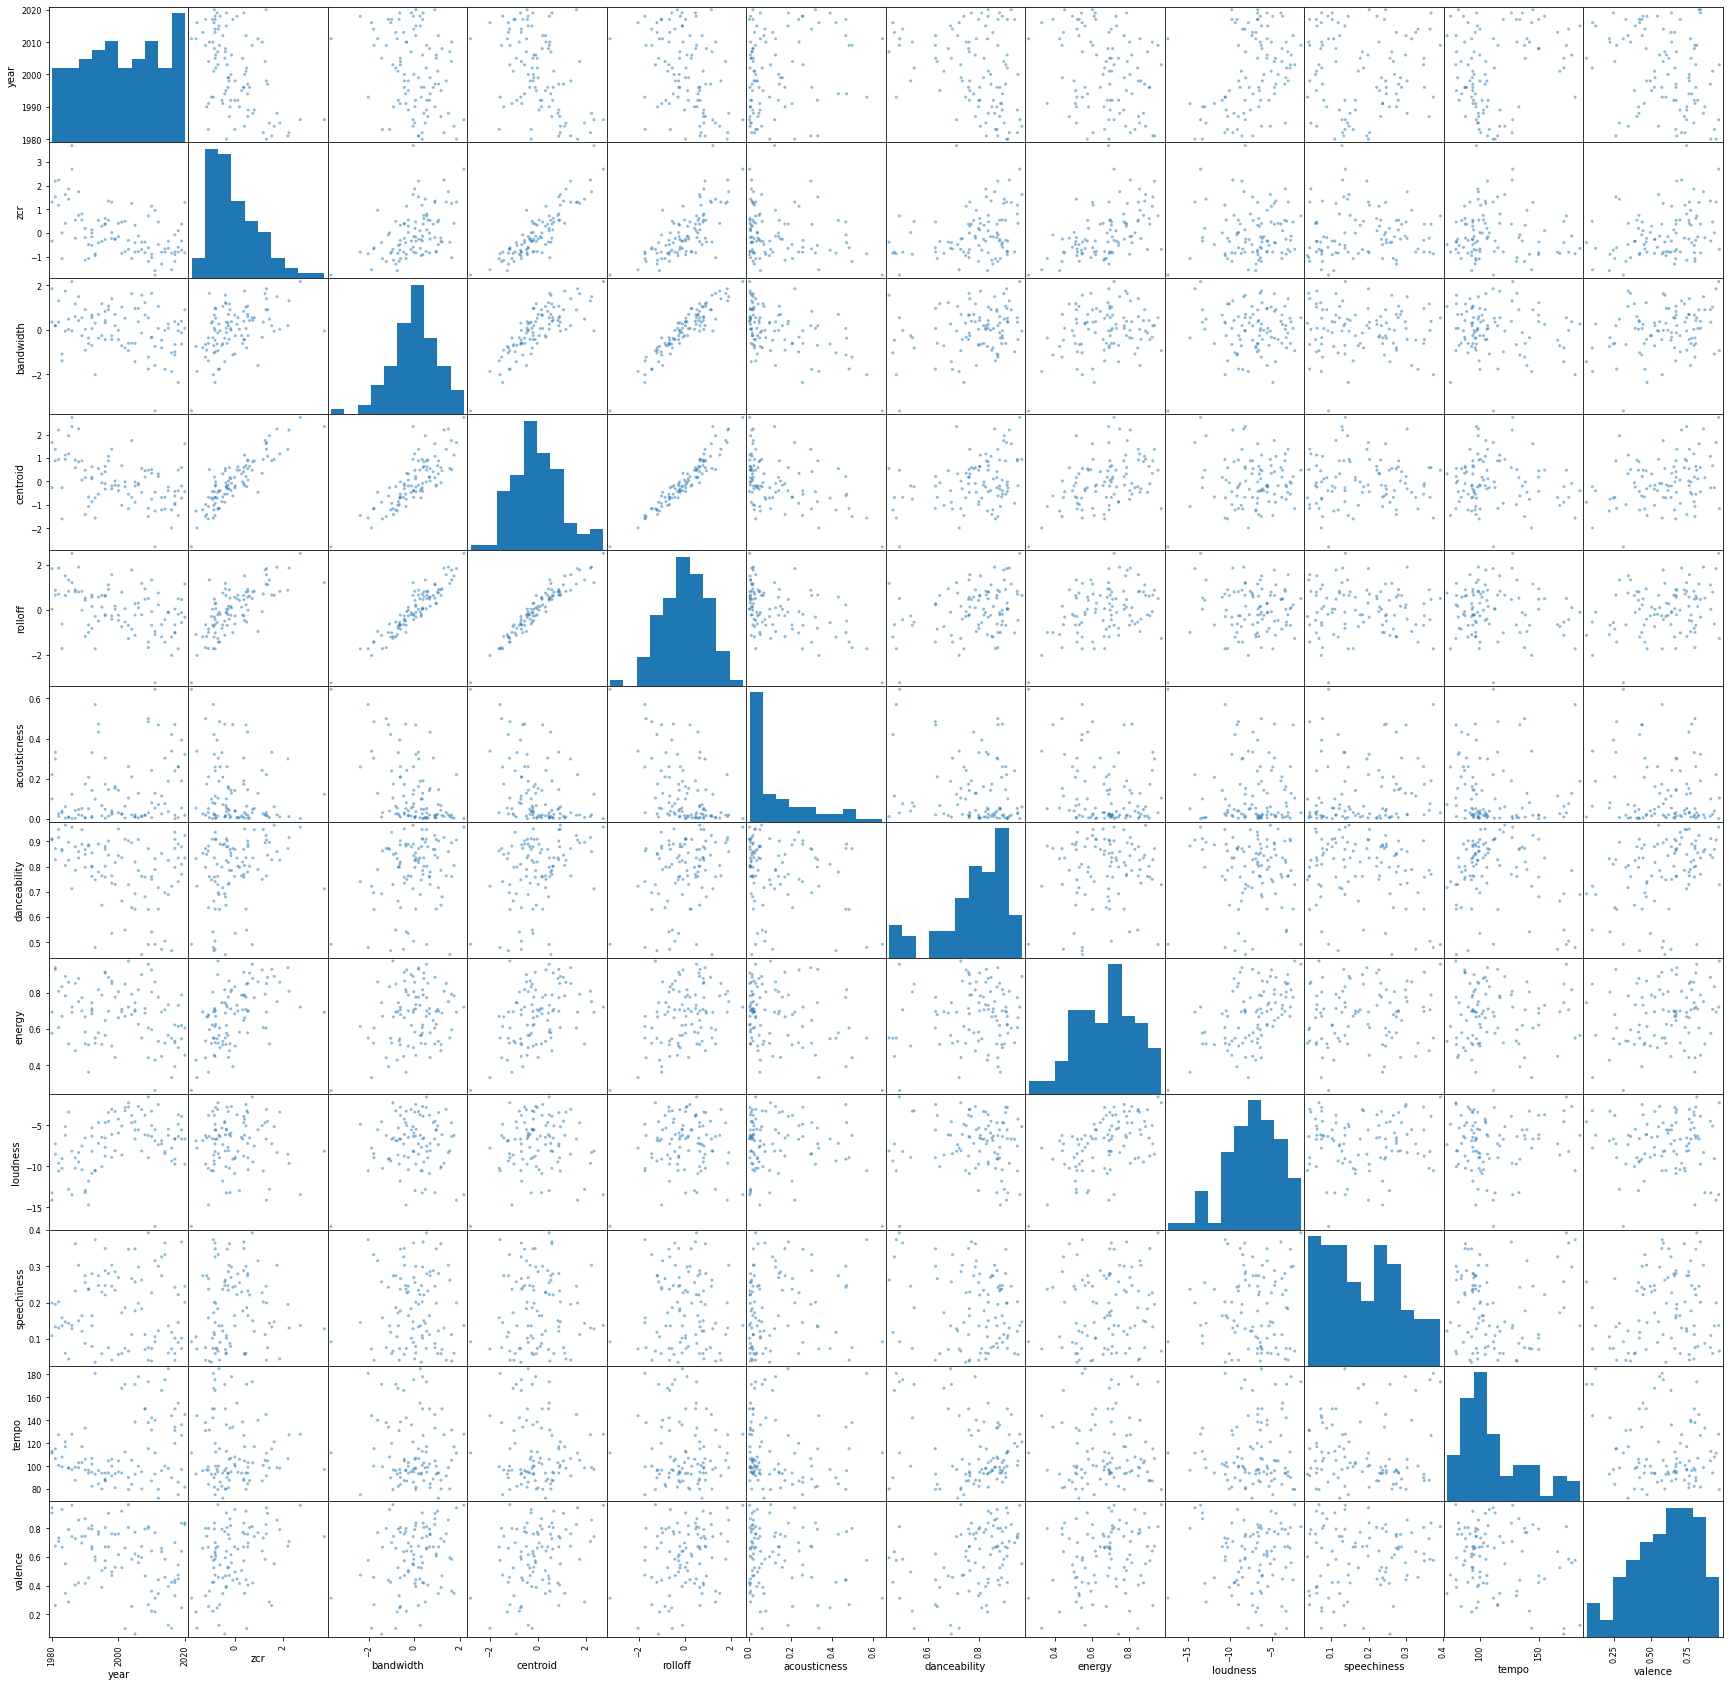

In [3]:
pd.plotting.scatter_matrix(df, figsize = (30,30));

### The following function displays a scatterplot in bokeh, as we'll see below.

In [12]:
def plot_columns(x, y):
    output_notebook()
    output_file('../results/' + x + '_' + y + '.html')
    source = ColumnDataSource(data=dict(
        x=list(df[x]),
        y=list(df[y]),
        title=list(df['title']),
        artist=list(df['artist']),
        year=list(df['year'])
    ))

    TOOLTIPS = [
        ("(x,y)", "($x, $y)"),
        ("title", "@title"),
        ("artist", "@artist"),
        ("year", "@year")
    ]

    p = figure(plot_width=600, plot_height=600, tooltips=TOOLTIPS,
               title=y + ' vs. '+ x)
    p.xaxis.axis_label = x
    p.yaxis.axis_label = y
    p.circle('x', 'y', size=5, source=source)

    show(p)

## Selected Graphs

### Loudness vs. Year
Here, we plot the progression of Spotify's loudness variable (measured in decibels) over time. We can see that loudness rises until it peaks in the 2000s, then begins to fall in the 2010s. This is consistent not only with popular beliefs about 2000s hip-hop, but also with the progression of the [loudness war](https://en.wikipedia.org/wiki/Loudness_war#2010s), a process whereby music recordings have consistently gotten louder over time, peaking in the mid-2000s. The outlier towards the bottom, by the way, is the Drake song "Marvins Room," which, to be honest, isn't really a hip-hop song, although Spotify tags it that way.

In [13]:
plot_columns('year', 'loudness')

Loading BokehJS ...

### Tempo vs. Year
Here, we plot the progression of Spotify's tempo variable (measured in beats per minute) over time. We can see that the variation in tempo in popular music has increased drastically in the last decade, with an increasing number of hit songs using much faster beats. Once again, this is consistent with popular belief about older hip-hop, which tended to be more uniform and structured than many hip-hop tracks today. (Think about the standard cadence and rhythm in early hip-hop hits such as Sugarhill Gang's "Rapper's Delight" or Grandmaster Flash's "The Message.")

In [14]:
plot_columns('year', 'tempo')

Loading BokehJS ...

### Zero Crossing Rate vs. Year
Here, we plot the progression of zero crossing rate, calculated with librosa, over time. We can see that zero crossing rate has tended to decrease over time. Zero crossing rate tends to correlate with sounds that are percussive, such as drums. This could be the consequence of an increasing diversity of beats being used as hip-hop developed, going from the more traditional beats found in early-80's tracks like "It's Tricky" by Run-D.M.C to the vocal samples and non-percussive instruments that are used more today. The highest zero-crossing rate is found with the Beastie Boys' "No Sleep Till Brooklyn," which uses a very intense guitar and drum-based beat.

In [15]:
plot_columns('year', 'zcr')

Loading BokehJS ...

### Spectral Centroid vs. Year
Here, we plot the progression of spectral centroid, calculated with librosa, over time. There is a moderate negative relationship between time and centroid, indicating that the pitch of music has decreased, to some degree, over the last 40 years. Although this could be due to many factors, one could be the decreasing influence of funk (which features lots of high-pitched synth and electric guitar) on hip-hop. 

In [16]:
plot_columns('year', 'centroid')

Loading BokehJS ...

The following two diagrams are the result of PCA conducted on the entire feature set, including MFCC's, chroma features, and all the features you see above. The first plot below shows the entire dataset in two dimensions extracted using PCA. There aren't any clearly distinct clusters, but we can still locate a central mass and outliers in both dimensions.

In [17]:
from IPython.display import HTML
HTML(filename='two_dim_pca.html')

For the following plot, we use PCA to project the data onto only a single dimension, and plot that dimension against time. We do see that there is a slight negative association between time and the PCA feature, although the correlation is relatively weak and we don't have much of an idea of what it means.

In [18]:
HTML(filename='pca_year.html')